In [1]:
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [5]:
dataframe=pd.read_csv('pima-indians-diabetes.csv',delimiter=',')
dataframe.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
X=dataframe.iloc[:,:8]
y=dataframe.iloc[:,8]
dataframe.shape

(767, 9)

In [7]:
features_train,features_test,target_train,target_test=train_test_split(X,y,test_size=0.33,random_state=0)


In [8]:
network=models.Sequential()
network.add(Dense(units=8,activation="relu",input_shape=(features_train.shape[1],)))



In [9]:
network.add(Dense(units=8,activation="relu"))
network.add(Dense(units=1,activation="sigmoid"))
network.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=network.fit(features_train,target_train,epochs=20,verbose=1,batch_size=100,validation_data=(features_test,target_test))

Epoch 1/20
6/6 [==============================] - 2s 75ms/step - loss: 18.5938 - accuracy: 0.4795 - val_loss: 18.3491 - val_accuracy: 0.4606
Epoch 2/20
6/6 [==============================] - 0s 13ms/step - loss: 17.2543 - accuracy: 0.4756 - val_loss: 17.0728 - val_accuracy: 0.4567
Epoch 3/20
6/6 [==============================] - 0s 13ms/step - loss: 15.9304 - accuracy: 0.4639 - val_loss: 15.7849 - val_accuracy: 0.4370
Epoch 4/20
6/6 [==============================] - 0s 13ms/step - loss: 14.6072 - accuracy: 0.4542 - val_loss: 14.4706 - val_accuracy: 0.4291
Epoch 5/20
6/6 [==============================] - 0s 15ms/step - loss: 13.3330 - accuracy: 0.4483 - val_loss: 13.1860 - val_accuracy: 0.4252
Epoch 6/20
6/6 [==============================] - 0s 14ms/step - loss: 12.0939 - accuracy: 0.4405 - val_loss: 11.9498 - val_accuracy: 0.4173
Epoch 7/20
6/6 [==============================] - 0s 13ms/step - loss: 10.9561 - accuracy: 0.4250 - val_loss: 10.7050 - val_accuracy: 0.4134
Epoch 8/20
6/

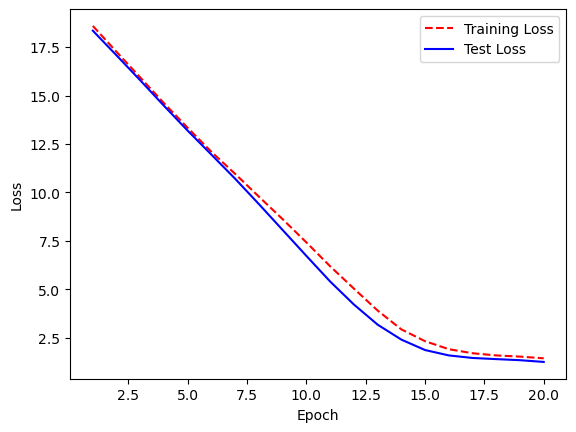

In [10]:
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count,training_loss,"r--")
plt.plot(epoch_count,test_loss,"b-")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [11]:
_,accuracy=network.evaluate(features_train,target_train)
print('Accuracy: %.2f'%(accuracy*100))
predicted_target=network.predict(features_test)
_,accuracy=network.evaluate(features_test,target_test)
print('Accuracy: %.2f'%(accuracy*100))

17/17 [==============================] - 0s 2ms/step - loss: 1.3705 - accuracy: 0.5088
Accuracy: 50.88
8/8 [==============================] - 0s 3ms/step - loss: 1.2574 - accuracy: 0.5630
Accuracy: 56.30


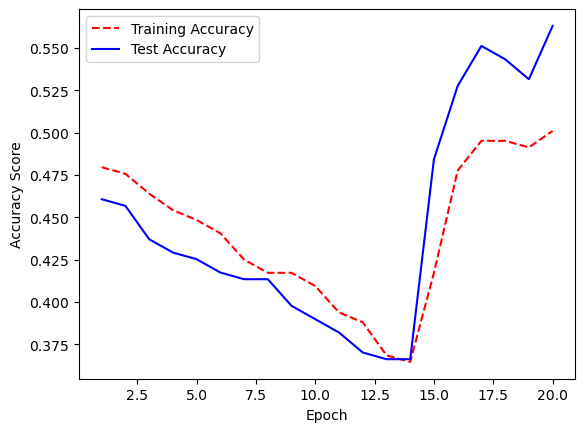

In [12]:
training_accuracy=history.history["accuracy"]
test_accuracy=history.history["val_accuracy"]
plt.plot(epoch_count,training_accuracy,"r--")
plt.plot(epoch_count,test_accuracy,"b-")
plt.legend(["Training Accuracy","Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()
